# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
combined_data.head()

# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_of_mice = combined_data["Mouse ID"].nunique()
num_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_ID = combined_data.loc[combined_data.duplicated(subset=["Mouse ID","Timepoint"]), "Mouse ID"].unique()
duplicate_mice_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[combined_data["Mouse ID"].isin(duplicate_mice_ID)==False]
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_num_of_mice = clean_data["Mouse ID"].nunique()
clean_num_of_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean=clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).mean()
median=clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).median()
var=clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).var()
std=clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).std()
sem=clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).sem()

# Assemble the resulting series into a single summary DataFrame.
summary_df=pd.DataFrame({"mean Tumor Volume": mean,
                         "median Tumor Volume": median,
                         "Tumor Volume variance": var,
                         "Tumor Volume std. Dev": std,
                         "Tumor Volume std.Err": sem})
summary_df

,mean Tumor Volume,median Tumor Volume,Tumor Volume variance,Tumor Volume std. Dev,Tumor Volume std.Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary= clean_data.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
agg_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

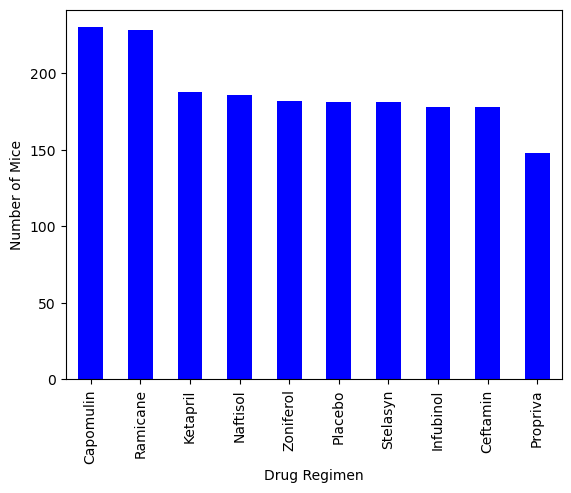

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count = clean_data["Drug Regimen"].value_counts()
mice_count

pandas_barplot = mice_count.plot.bar(color="b")
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')

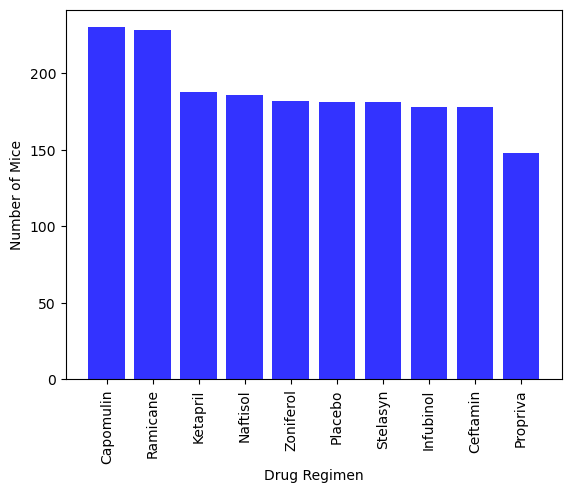

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values
plt.bar(x_axis, y_axis, color="b", alpha=0.8, align="center")
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.xticks(rotation="vertical")
plt.show()

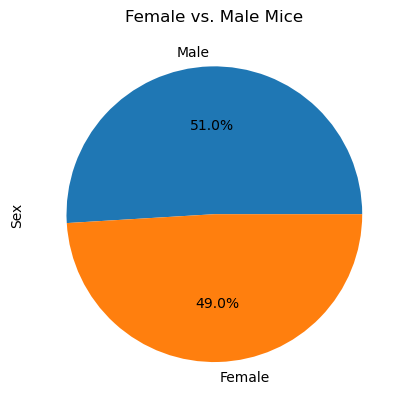

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = clean_data["Sex"].value_counts()
plt.title("Female vs. Male Mice")
pie_plot = gender_data.plot.pie(autopct= "%1.1f%%")
plt.show()

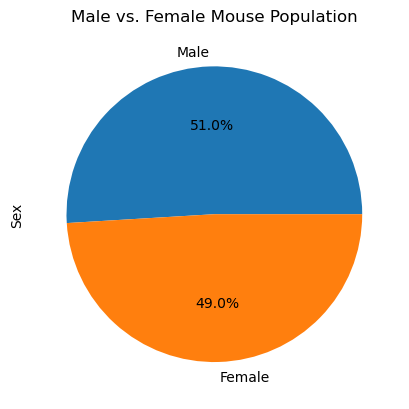

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=["Female", "Male"]
sizes=[49.79, 50.20]
pie_plot=gender_data.plot.pie(y="Total Count", autopct= "%1.1f%%")
plt.title("Male vs. Female Mouse Population")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_data = clean_data.loc[clean_data["Drug Regimen"] =="Capomulin",:]
Ramicane_data = clean_data.loc[clean_data["Drug Regimen"] =="Ramicane",:]
Infubinol_data = clean_data.loc[clean_data["Drug Regimen"] =="Infubinol",:]
Ceftamin_data = clean_data.loc[clean_data["Drug Regimen"] =="Ceftamin",:]

# Start by getting the last (greatest) timepoint for each mouse
Capomulin_last = Capomulin_data.groupby("Mouse ID").max()["Timepoint"]
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, clean_data, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

Ramicane_last = Ramicane_data.groupby("Mouse ID").max()["Timepoint"]
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, clean_data, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()

Infubinol_last = Infubinol_data.groupby("Mouse ID").max()["Timepoint"]
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, clean_data, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()

Ceftamin_last = Ceftamin_data.groupby("Mouse ID").max()["Timepoint"]
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, clean_data, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()


Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles = Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin tumors:{lowerq}")
print(f"The upper quartile of Capomulin tumors:{upperq}")
print(f"The lower interquartile range of Capomulin tumors:{iqr}")
print(f"The median of Capomulin tumors:{quartiles[.5]}")

lower_bound = lowerq-(1.5*iqr)
upper_bound = upperq+(1.5*iqr)

print(f"Values below {lower_bound} outliers.")
print(f"Values above {upper_bound} outliers.")

Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]

quartiles = Ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane tumors:{lowerq}")
print(f"The upper quartile of Ramicane tumors:{upperq}")
print(f"The lower interquartile range of Ramicane tumors:{iqr}")
print(f"The median of Ramicane tumors:{quartiles[.5]}")

lower_bound = lowerq-(1.5*iqr)
upper_bound = upperq+(1.5*iqr)

print(f"Values below {lower_bound} outliers.")
print(f"Values above {upper_bound} outliers.")


Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]

quartiles = Infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol tumors:{lowerq}")
print(f"The upper quartile of Infubinol tumors:{upperq}")
print(f"The lower interquartile range of Infubinol tumors:{iqr}")
print(f"The median of Infubinol tumors:{quartiles[.5]}")

lower_bound = lowerq-(1.5*iqr)
upper_bound = upperq+(1.5*iqr)

print(f"Values below {lower_bound} outliers.")
print(f"Values above {upper_bound} outliers.")

Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

quartiles = Infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin tumors:{lowerq}")
print(f"The upper quartile of Ceftamin tumors:{upperq}")
print(f"The lower interquartile range of Ceftamin tumors:{iqr}")
print(f"The median of Ceftamin tumors:{quartiles[.5]}")

lower_bound = lowerq-(1.5*iqr)
upper_bound = upperq+(1.5*iqr)

print(f"Values below {lower_bound} outliers.")
print(f"Values above {upper_bound} outliers.")


The lower quartile of Capomulin tumors:32.37735684
The upper quartile of Capomulin tumors:40.1592203
The lower interquartile range of Capomulin tumors:7.781863460000004
The median of Capomulin tumors:38.1251644
Values below 20.70456164999999 outliers.
Values above 51.83201549 outliers.
The lower quartile of Ramicane tumors:31.56046955
The upper quartile of Ramicane tumors:40.65900627
The lower interquartile range of Ramicane tumors:9.098536719999998
The median of Ramicane tumors:36.56165229
Values below 17.912664470000003 outliers.
Values above 54.30681135 outliers.
The lower quartile of Infubinol tumors:54.04860769
The upper quartile of Infubinol tumors:65.52574285
The lower interquartile range of Infubinol tumors:11.477135160000003
The median of Infubinol tumors:60.16518046
Values below 36.83290494999999 outliers.
Values above 82.74144559000001 outliers.
The lower quartile of Ceftamin tumors:54.04860769
The upper quartile of Ceftamin tumors:65.52574285
The lower interquartile range o

In [14]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = combined_data[combined_data["Drug Regimen"].isin(drug_list)]
drugs.head()

last_timepoint = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
last_timepoint = last_timepoint.stack(level=0).unstack(level=0)
for drug in drug_list:
    print(drug)
    
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset   
# Determine outliers using upper and lower bounds

treatment = 0
for drug in drug_list:
    quartiles = last_timepoint[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[.25].round(2)
    upperq = quartiles[.75].round(2)
    iqr = (upperq-lowerq).round(2)
    lower_bound = round(lowerq-(1.5*iqr),2)
    upper_bound = round(upperq+(1.5*iqr),2)
    
    if treatment == 0:
        print(f"-------------------------------------------")
    print(f"The lower quartile of {drug} treatments is: {lowerq}")
    print(f"The upper quartile of {drug} treatments is: {upperq}")
    print(f"The interquartile range of {drug} treatments is: {iqr}")
    print(f"Values below {lower_bound} {drug} outliers.")
    print(f"Values above {upper_bound} {drug} outliers.")
    print(f"-------------------------------------------")
    treatment+=1

Capomulin
Ramicane
Infubinol
Ceftamin
-------------------------------------------
The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatments is: 7.78
Values below 20.71 Capomulin outliers.
Values above 51.83 Capomulin outliers.
-------------------------------------------
The lower quartile of Ramicane treatments is: 31.56
The upper quartile of Ramicane treatments is: 40.66
The interquartile range of Ramicane treatments is: 9.1
Values below 17.91 Ramicane outliers.
Values above 54.31 Ramicane outliers.
-------------------------------------------
The lower quartile of Infubinol treatments is: 54.05
The upper quartile of Infubinol treatments is: 65.53
The interquartile range of Infubinol treatments is: 11.48
Values below 36.83 Infubinol outliers.
Values above 82.75 Infubinol outliers.
-------------------------------------------
The lower quartile of Ceftamin treatments is: 48.72
The upper quarti

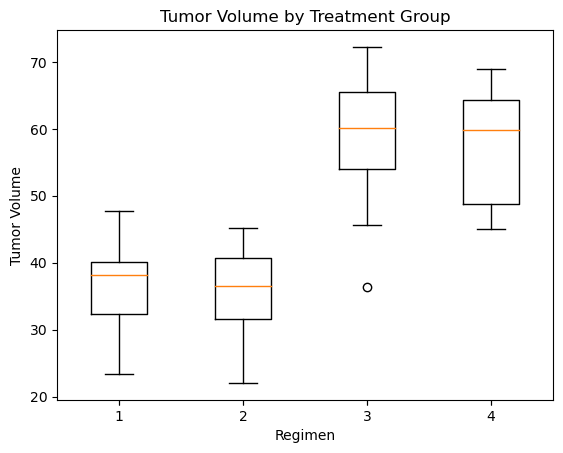

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot_list = []
for drug in drug_list:
    boxplot_list.append(list(last_timepoint[drug].dropna()))
    
fig = plt.figure()
plt.xlabel("Regimen")
plt.xticks([1,2,3,4], drug_list)
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume by Treatment Group")
plt.boxplot(boxplot_list)
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

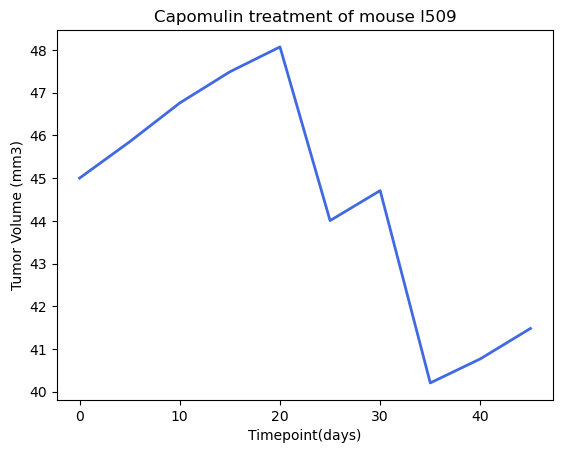

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
forline_data = Capomulin_data.loc[Capomulin_data["Mouse ID"] == "l509"]
forline_data.head()
x_axis = forline_data["Timepoint"]
tumsiz = forline_data["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title("Capomulin treatment of mouse l509")
plt.plot(x_axis, tumsiz,linewidth=2,color="royalblue", label="Fahreneit")
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")

C:\Users\Chrissie\AppData\Local\Temp\ipykernel_42332\1601106220.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_capm_vol = Capomulin_data.groupby(["Mouse ID"]).mean()


Text(0, 0.5, 'Average Tumor Volume (mm3)')

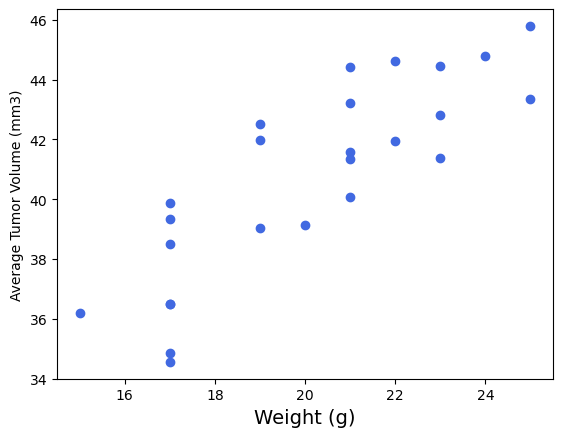

In [23]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
fig1, ax1 = plt.subplots()
avg_capm_vol = Capomulin_data.groupby(["Mouse ID"]).mean()

marker_size = 15
plt.scatter(avg_capm_vol["Weight (g)"], avg_capm_vol["Tumor Volume (mm3)"], color="royalblue")
plt.xlabel("Weight (g)",fontsize =14)
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

In [25]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"])
print(f"The correlation coefficient for mouse weight and the average observed tumor volume is {round(correlation[0],2)}")

The correlation coefficient for mouse weight and the average observed tumor volume is 0.84


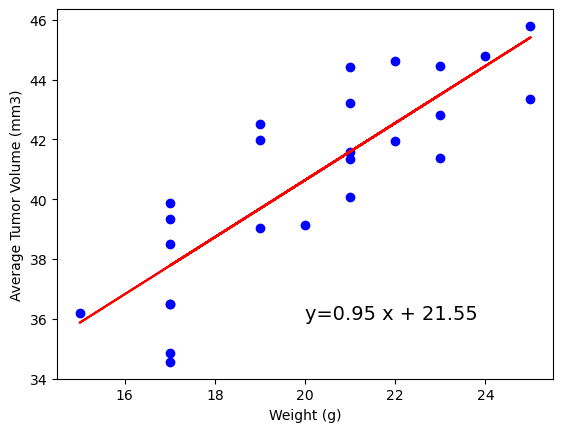

In [28]:
(slope, intercept, rvalue, pvalue, stderr)= st.linregress(avg_capm_vol["Weight (g)"],avg_capm_vol["Tumor Volume (mm3)"])
regress_values=avg_capm_vol["Weight (g)"]*slope+intercept
line_eq=f"y={round(slope,2)} x + {round(intercept,2)}"

plt.scatter(avg_capm_vol["Weight (g)"], avg_capm_vol["Tumor Volume (mm3)"], color="b")
plt.plot(avg_capm_vol["Weight (g)"], regress_values, color="red")
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()